# Red para COVID-19

Esta es una red secuencial simple para tratar de predecir el dato de número de contagiados de COVID19 en México que se da a las 19:00 horas por parte del gobierno.

**Para ejecutar la predicción:**

**1)** Ejecutar processing.sh, este script descarga el archivo time_series_covid19_confirmed_global.csv con datos de contagiados por país. Este archivo se actualiza en internet aproximadamente a las 5:30pm con datos del día anterior, hay que revisar que esté actualizado a la fecha del día de la predicción.

chmod +x processing.sh

./processing.sh

**2)** Abrir jupyter notebook (se requiere keras, tensorflow, pandas y numpy instaldos).

jupyter notebook COVID-19.ipynb

**3)** Actualizar dias_a_usar y dia_a_predecir. Como referencia, el 30 de marzo fue el día 33 de infección en México, por lo que dia_a_predecir=33 y dias_a_usar=32.

**4)** Ejecutar todos los cuadros.

Creado por Juan Felipe Huan Lew Yee, Neftalí Isaí Rodríguez Rojas y Jorge Martín del Campo Ramírez.

Se define la clase pais

Definimos el dia que queremos la prediccion

In [1]:
dia_a_predecir = 45
dias_a_usar = 44

Definimos la lista de paises que analizaremos. (Hay más paises en la base de datos de John Hopkins)

In [2]:
#Quite a Vietnam y Dominica porque siempre salen mal sus predicciones.
country_namelist = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea South', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liberia', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malaysia', 'Maldives', 'Malta', 'Mauritania', 'Mauritius', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'San Marino', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Singapore', 'Slovakia', 'Slovenia', 'Somalia', 'South Africa', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Tanzania', 'Thailand', 'Togo', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uruguay', 'US', 'Uzbekistan', 'Venezuela', 'Vietnam', 'Zambia', 'Zimbabwe', 'Dominica', 'Grenada', 'Mozambique', 'Syria', 'Timor-Leste', 'Belize', 'Laos', 'Libya', 'Guinea-Bissau', 'Mali', 'Saint Kitts and Nevis', 'Burma', 'Botswana', 'Burundi', 'Sierra Leone', 'Malawi']
#country_namelist = ["Afghanistan","Algeria","Australia","Austria","Bahrain","Belgium","Brazil","Cambodia","Canada","China","Croatia","Egypt","Finland","France","Georgia","Germany","Greece","India","Iran","Iraq","Israel","Italy","Japan","Korea South","Kuwait","Lebanon","Malaysia","Nepal","North Macedonia","Norway","Oman","Pakistan","Philippines","Romania","Russia","Singapore","Spain","Sri Lanka","Sweden","Switzerland","Thailand","United Arab Emirates","United Kingdom","US","Vietnam"]

Abrimos la base de datos de Superficie, Población y Continente por país, creamos un objeto para cada país. Posterirmente, abirmos la base de datos de John Hopkins y extraemos los datos de infectos por día y la latitud y longitud de cada país. También calculamos el día de inicio de la infección

In [3]:
db = open('database.csv','w')

print("Pais","Area","poblacion","Namerica","Samerica","Europe","Asia","Oceania","Africa","lat","long","Dia_inicio","PIB","Gasto_Salud",end=',',file=db,sep=',')
for value in range(dias_a_usar):
    print(value+1,file=db,end = ',')
print(dia_a_predecir,file=db)

for country in country_namelist:
    f = open('propiedades_por_pais.csv')
    for line in f:
        if(country == line.replace('\n','').split(',')[0]):
            pais=line.replace('\n','').split(',')[0]
            superficie=line.replace('\n','').split(',')[1]
            poblacion=line.replace('\n','').split(',')[2]
            namerica=line.replace('\n','').split(',')[3]
            samerica=line.replace('\n','').split(',')[4]
            europe=line.replace('\n','').split(',')[5]
            asia=line.replace('\n','').split(',')[6]
            oceania=line.replace('\n','').split(',')[7]
            africa=line.replace('\n','').split(',')[8]
            pib=line.replace('\n','').split(',')[9]
            salud_pib=line.replace('\n','').split(',')[10]            
    f.close()
    
    f = open('database_confirmed.csv')
    infected = []
    dia_inicio = 0
    for line in f:
        if(country == line.split(',')[1]):
            lat = float(line.split(',')[2])
            long = float(line.split(',')[3])
            country_data = []
            data = line.replace('\n','').split(',')[4:]
            for number in data:
                if(number != '0'):
                    infected.append(int(number))
                else:
                    dia_inicio += 1                    
    f.close()

    if(len(infected)<=dia_a_predecir):
#        print(pais,superficie,poblacion,namerica,samerica,europe,asia,oceania,africa,lat,long,pib,salud_pib,len(infected))
        continue
    print(pais,superficie,poblacion,namerica,samerica,europe,asia,oceania,africa,lat,long,dia_inicio,pib,salud_pib,end=',',file=db,sep=',')
    for value in infected[:dias_a_usar]:
        print(value,file=db,end = ',')
    print(infected[dia_a_predecir-1],file=db)
db.close()          

Usamos la lista de objetos Pais para nuestra propia base de datos.

Importamos librerias

In [4]:
import numpy as np
import keras
import pandas as pd

Using TensorFlow backend.


Leamos la base de datos que acabamos de crear.

In [5]:
data = pd.read_csv("database.csv",sep=',') 

Imprimimos la base de datos

In [6]:
data

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,36,37,38,39,40,41,42,43,44,45
0,Afghanistan,652230.0,3.222556e+07,0,0,0,1,0,0,33.000000,...,170,174,237,273,281,299,349,367,423,444
1,Algeria,2381741.0,4.300000e+07,0,0,0,0,0,1,28.033900,...,716,847,986,1171,1251,1320,1423,1468,1572,1666
2,Australia,7692024.0,2.566534e+07,0,0,0,0,1,0,-31.996188,...,27,30,39,52,55,60,63,76,91,107
3,Austria,83871.0,8.902600e+06,0,0,1,0,0,0,47.516200,...,10180,10711,11129,11524,11781,12051,12297,12639,12942,13244
4,Bahrain,778.0,1.543300e+06,0,0,0,1,0,0,26.027500,...,515,567,569,643,672,688,700,756,811,823
5,Belgium,30528.0,1.152445e+07,0,0,1,0,0,0,50.833300,...,267,314,314,559,689,886,1058,1243,1486,1795
6,Brazil,8515767.0,2.113367e+08,0,1,0,0,0,0,-14.235000,...,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638
7,Cambodia,181035.0,1.528849e+07,0,0,0,1,0,0,11.550000,...,1,1,1,1,1,1,2,2,2,3
8,Canada,9984670.0,3.797909e+07,1,0,0,0,0,0,47.982907,...,24,27,30,33,37,49,54,64,77,79
9,China,9596961.0,1.402030e+09,0,0,0,1,0,0,32.828385,...,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690


Normalizamos algunas variables

In [7]:
from sklearn import preprocessing

print("Area")
area = data.Area #returns a numpy array
#normalized_area=(area-area.mean())/area.std()
areamax=area.max()
areamin=area.min()
normalized_area=(area-area.min())/(area.max()-area.min())
print(areamin,areamax)
data['Area'] = normalized_area
print(areamin,areamax)

print("Poblacion")
poblacion = data.poblacion #returns a numpy array
#normalized_poblacion=(poblacion-poblacion.mean())/poblacion.std()
poblacionmax=poblacion.max()
poblacionmin=poblacion.min()
normalized_poblacion=(poblacion-poblacion.min())/(poblacion.max()-poblacion.min())
print(poblacionmin,poblacionmax)
data['poblacion'] = normalized_poblacion
print(poblacionmin,poblacionmax)

print("lat")
lat = data.lat #returns a numpy array
latmax=lat.max()
latmin=lat.min()
normalized_lat=(lat-lat.min())/(lat.max()-lat.min())
print(latmin,latmax)
data['lat'] = normalized_lat
print(latmin,latmax)

print("long")
long = data.long #returns a numpy array
longmax=long.max()
longmin=long.min()
normalized_long=(long-long.min())/(long.max()-long.min())
print(longmin,longmax)
data['long'] = normalized_long
print(longmin,longmax)

print("Dia_inicio")
Dia_inicio = data.Dia_inicio #returns a numpy array
Dia_iniciomax=Dia_inicio.max()
Dia_iniciomin=Dia_inicio.min()
normalized_Dia_inicio=(Dia_inicio-Dia_inicio.min())/(Dia_inicio.max()-Dia_inicio.min())
print(Dia_iniciomin,Dia_iniciomax)
data['Dia_inicio'] = normalized_Dia_inicio
print(Dia_iniciomin,Dia_iniciomax)

print("PIB")
PIB = data.PIB #returns a numpy array
PIBmax=PIB.max()
PIBmin=PIB.min()
normalized_PIB=(PIB-PIB.min())/(PIB.max()-PIB.min())
print(PIBmin,PIBmax)
data['PIB'] = normalized_PIB
print(PIBmin,PIBmax)

print("Gasto_Salud")
Gasto_Salud = data.Gasto_Salud #returns a numpy array
Gasto_Saludmax=Gasto_Salud.max()
Gasto_Saludmin=Gasto_Salud.min()
normalized_Gasto_Salud=(Gasto_Salud-Gasto_Salud.min())/(Gasto_Salud.max()-Gasto_Salud.min())
print(Gasto_Saludmin,Gasto_Saludmax)
data['Gasto_Salud'] = normalized_Gasto_Salud
print(Gasto_Saludmin,Gasto_Saludmax)

Area
716.0 17098246.0
716.0 17098246.0
Poblacion
1543300.0 1402030160.0
1543300.0 1402030160.0
lat
-31.9961875 64.0
-31.9961875 64.0
long
-95.7129 141.2327875
-95.7129 141.2327875
Dia_inicio
0 35
0 35
PIB
12672.0 21439453.0
12672.0 21439453.0
Gasto_Salud
0.52 14.32
0.52 14.32


Imprimimos la base de datos normalizada

In [8]:
data

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,36,37,38,39,40,41,42,43,44,45
0,Afghanistan,0.038106,0.021908,0,0,0,1,0,0,0.677071,...,170,174,237,273,281,299,349,367,423,444
1,Algeria,0.139261,0.029602,0,0,0,0,0,1,0.625338,...,716,847,986,1171,1251,1320,1423,1468,1572,1666
2,Australia,0.449849,0.017224,0,0,0,0,1,0,0.000000,...,27,30,39,52,55,60,63,76,91,107
3,Austria,0.004864,0.005255,0,0,1,0,0,0,0.828287,...,10180,10711,11129,11524,11781,12051,12297,12639,12942,13244
4,Bahrain,0.000004,0.000000,0,0,0,1,0,0,0.604437,...,515,567,569,643,672,688,700,756,811,823
5,Belgium,0.001744,0.007127,0,0,1,0,0,0,0.862841,...,267,314,314,559,689,886,1058,1243,1486,1795
6,Brazil,0.498028,0.149800,0,1,0,0,0,0,0.185020,...,6836,8044,9056,10360,11130,12161,14034,16170,18092,19638
7,Cambodia,0.010546,0.009815,0,0,0,1,0,0,0.453624,...,1,1,1,1,1,1,2,2,2,3
8,Canada,0.583941,0.026017,1,0,0,0,0,0,0.833149,...,24,27,30,33,37,49,54,64,77,79
9,China,0.561265,1.000000,0,0,0,1,0,0,0.675283,...,78166,78600,78928,79356,79932,80136,80261,80386,80537,80690


Creamos un conjunto X y un conjunto Y y dividimos train y test

In [9]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame()
X['Area'] = data['Area']
X['poblacion'] = data['poblacion']
#X['Namerica'] = data['Namerica']
#X['Samerica'] = data['Samerica']
#X['Europe'] = data['Europe']
#X['Asia'] = data['Asia']
#X['Oceania'] = data['Oceania']
#X['Africa'] = data['Africa']
X['lat'] = data['lat']
X['long'] = data['long']
X['Dia_inicio'] = data['Dia_inicio']
X['PIB'] = data['PIB']
#X['Gasto_Salud'] = data['Gasto_Salud']
for i in range(1,dias_a_usar+1):
    X[str(i)] = data[str(i)]
Y = pd.DataFrame()
Y[str(dia_a_predecir)] = data[str(dia_a_predecir)]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(42, 50) (42, 1)
(3, 50) (3, 1)


Creamos la red neuronal

In [10]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model = Sequential()
model.add(Dense(64, input_dim=dias_a_usar+6, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

Compilamos la red

In [11]:
model.compile(loss='MAE', optimizer='adam')

Entrenamos la red

In [12]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test,y_test))

Train on 42 samples, validate on 3 samples
Epoch 1/1000
42/42 [==============================] - 1s 24ms/step - loss: 7035.5290 - val_loss: 341.7748
Epoch 2/1000
42/42 [==============================] - 0s 653us/step - loss: 6095.5066 - val_loss: 317.4990
Epoch 3/1000
42/42 [==============================] - 0s 1ms/step - loss: 5670.0956 - val_loss: 293.2876
Epoch 4/1000
42/42 [==============================] - 0s 737us/step - loss: 5030.0976 - val_loss: 268.5589
Epoch 5/1000
42/42 [==============================] - 0s 438us/step - loss: 4313.1219 - val_loss: 234.9531
Epoch 6/1000
42/42 [==============================] - 0s 551us/step - loss: 3412.7197 - val_loss: 189.6982
Epoch 7/1000
42/42 [==============================] - 0s 190us/step - loss: 2332.5798 - val_loss: 133.5977
Epoch 8/1000
42/42 [==============================] - 0s 820us/step - loss: 2075.7300 - val_loss: 73.2374
Epoch 9/1000
42/42 [==============================] - 0s 1ms/step - loss: 2380.0953 - val_loss: 19.3852
E

42/42 [==============================] - 0s 314us/step - loss: 281.9516 - val_loss: 54.7476
Epoch 78/1000
42/42 [==============================] - 0s 356us/step - loss: 526.7403 - val_loss: 53.7262
Epoch 79/1000
42/42 [==============================] - 0s 317us/step - loss: 585.0200 - val_loss: 28.1315
Epoch 80/1000
42/42 [==============================] - 0s 507us/step - loss: 265.3653 - val_loss: 7.6791
Epoch 81/1000
42/42 [==============================] - 0s 357us/step - loss: 412.9344 - val_loss: 22.2123
Epoch 82/1000
42/42 [==============================] - 0s 745us/step - loss: 575.9528 - val_loss: 14.2986
Epoch 83/1000
42/42 [==============================] - 0s 381us/step - loss: 403.1921 - val_loss: 11.0799
Epoch 84/1000
42/42 [==============================] - 0s 526us/step - loss: 472.8235 - val_loss: 19.4220
Epoch 85/1000
42/42 [==============================] - 0s 713us/step - loss: 606.9676 - val_loss: 6.1783
Epoch 86/1000
42/42 [==============================] - 0s 519u

42/42 [==============================] - 0s 487us/step - loss: 264.9592 - val_loss: 13.9258
Epoch 155/1000
42/42 [==============================] - 0s 348us/step - loss: 485.9655 - val_loss: 8.8652
Epoch 156/1000
42/42 [==============================] - 0s 368us/step - loss: 421.1716 - val_loss: 11.9601
Epoch 157/1000
42/42 [==============================] - 0s 437us/step - loss: 242.8512 - val_loss: 25.7293
Epoch 158/1000
42/42 [==============================] - 0s 436us/step - loss: 294.0694 - val_loss: 11.8709
Epoch 159/1000
42/42 [==============================] - ETA: 0s - loss: 158.314 - 0s 648us/step - loss: 224.2912 - val_loss: 6.0362
Epoch 160/1000
42/42 [==============================] - 0s 570us/step - loss: 198.1295 - val_loss: 6.8647
Epoch 161/1000
42/42 [==============================] - 0s 707us/step - loss: 268.8290 - val_loss: 12.9368
Epoch 162/1000
42/42 [==============================] - 0s 654us/step - loss: 392.5312 - val_loss: 5.3862
Epoch 163/1000
42/42 [========

42/42 [==============================] - 0s 321us/step - loss: 176.6438 - val_loss: 21.6981
Epoch 231/1000
42/42 [==============================] - 0s 325us/step - loss: 260.4531 - val_loss: 4.6034
Epoch 232/1000
42/42 [==============================] - 0s 333us/step - loss: 162.9806 - val_loss: 5.9633
Epoch 233/1000
42/42 [==============================] - 0s 258us/step - loss: 218.6232 - val_loss: 5.1849
Epoch 234/1000
42/42 [==============================] - 0s 621us/step - loss: 274.1312 - val_loss: 10.7367
Epoch 235/1000
42/42 [==============================] - 0s 517us/step - loss: 277.5394 - val_loss: 5.2723
Epoch 236/1000
42/42 [==============================] - 0s 693us/step - loss: 207.3881 - val_loss: 5.9336
Epoch 237/1000
42/42 [==============================] - 0s 683us/step - loss: 188.8682 - val_loss: 12.5475
Epoch 238/1000
42/42 [==============================] - 0s 901us/step - loss: 203.0651 - val_loss: 19.9303
Epoch 239/1000
42/42 [==============================] - 0

42/42 [==============================] - 0s 360us/step - loss: 157.9878 - val_loss: 9.6304
Epoch 308/1000
42/42 [==============================] - 0s 405us/step - loss: 236.6080 - val_loss: 5.6549
Epoch 309/1000
42/42 [==============================] - 0s 376us/step - loss: 175.7161 - val_loss: 6.9436
Epoch 310/1000
42/42 [==============================] - 0s 754us/step - loss: 175.9579 - val_loss: 7.9582
Epoch 311/1000
42/42 [==============================] - 0s 1ms/step - loss: 226.9154 - val_loss: 8.4321
Epoch 312/1000
42/42 [==============================] - 0s 1ms/step - loss: 241.4516 - val_loss: 13.7214
Epoch 313/1000
42/42 [==============================] - 0s 1ms/step - loss: 161.1155 - val_loss: 6.9267
Epoch 314/1000
42/42 [==============================] - 0s 360us/step - loss: 182.5994 - val_loss: 6.3534
Epoch 315/1000
42/42 [==============================] - 0s 434us/step - loss: 148.2098 - val_loss: 13.4698
Epoch 316/1000
42/42 [==============================] - 0s 497us/

Epoch 384/1000
42/42 [==============================] - 0s 420us/step - loss: 346.9722 - val_loss: 11.1096
Epoch 385/1000
42/42 [==============================] - 0s 616us/step - loss: 241.1517 - val_loss: 8.2444
Epoch 386/1000
42/42 [==============================] - 0s 381us/step - loss: 179.2596 - val_loss: 8.3732
Epoch 387/1000
42/42 [==============================] - 0s 1ms/step - loss: 153.1818 - val_loss: 19.0251
Epoch 388/1000
42/42 [==============================] - 0s 2ms/step - loss: 292.2684 - val_loss: 18.4921
Epoch 389/1000
42/42 [==============================] - 0s 2ms/step - loss: 219.3665 - val_loss: 8.7361
Epoch 390/1000
42/42 [==============================] - 0s 1ms/step - loss: 210.3365 - val_loss: 8.7750
Epoch 391/1000
42/42 [==============================] - 0s 858us/step - loss: 189.2530 - val_loss: 14.1239
Epoch 392/1000
42/42 [==============================] - 0s 736us/step - loss: 215.5595 - val_loss: 19.1439
Epoch 393/1000
42/42 [===========================

42/42 [==============================] - 0s 790us/step - loss: 200.8368 - val_loss: 8.5722
Epoch 462/1000
42/42 [==============================] - 0s 704us/step - loss: 163.4431 - val_loss: 7.3768
Epoch 463/1000
42/42 [==============================] - 0s 1ms/step - loss: 194.7292 - val_loss: 6.7160
Epoch 464/1000
42/42 [==============================] - 0s 697us/step - loss: 126.2240 - val_loss: 11.8078
Epoch 465/1000
42/42 [==============================] - 0s 997us/step - loss: 314.5453 - val_loss: 23.1805
Epoch 466/1000
42/42 [==============================] - 0s 317us/step - loss: 553.1554 - val_loss: 14.2296
Epoch 467/1000
42/42 [==============================] - 0s 332us/step - loss: 428.0686 - val_loss: 14.7416
Epoch 468/1000
42/42 [==============================] - 0s 500us/step - loss: 290.5283 - val_loss: 28.1552
Epoch 469/1000
42/42 [==============================] - 0s 830us/step - loss: 320.6695 - val_loss: 11.2466
Epoch 470/1000
42/42 [==============================] - 0

42/42 [==============================] - 0s 549us/step - loss: 165.3436 - val_loss: 7.0579
Epoch 539/1000
42/42 [==============================] - 0s 698us/step - loss: 135.8200 - val_loss: 13.4678
Epoch 540/1000
42/42 [==============================] - 0s 850us/step - loss: 200.8598 - val_loss: 13.8592
Epoch 541/1000
42/42 [==============================] - 0s 557us/step - loss: 214.6934 - val_loss: 9.6472
Epoch 542/1000
42/42 [==============================] - 0s 351us/step - loss: 140.3950 - val_loss: 8.2838
Epoch 543/1000
42/42 [==============================] - 0s 393us/step - loss: 255.9117 - val_loss: 23.8079
Epoch 544/1000
42/42 [==============================] - 0s 521us/step - loss: 465.4672 - val_loss: 12.6395
Epoch 545/1000
42/42 [==============================] - 0s 615us/step - loss: 189.7549 - val_loss: 18.7633
Epoch 546/1000
42/42 [==============================] - ETA: 0s - loss: 374.303 - 0s 275us/step - loss: 370.3149 - val_loss: 35.9757
Epoch 547/1000
42/42 [=======

Epoch 615/1000
42/42 [==============================] - 0s 1ms/step - loss: 96.5081 - val_loss: 9.2390
Epoch 616/1000
42/42 [==============================] - 0s 995us/step - loss: 77.9145 - val_loss: 7.0693
Epoch 617/1000
42/42 [==============================] - 0s 646us/step - loss: 135.0736 - val_loss: 9.9282
Epoch 618/1000
42/42 [==============================] - 0s 560us/step - loss: 177.6476 - val_loss: 11.4308
Epoch 619/1000
42/42 [==============================] - 0s 427us/step - loss: 128.3297 - val_loss: 4.3436
Epoch 620/1000
42/42 [==============================] - 0s 567us/step - loss: 246.7858 - val_loss: 10.9450
Epoch 621/1000
42/42 [==============================] - 0s 371us/step - loss: 378.9576 - val_loss: 4.5589
Epoch 622/1000
42/42 [==============================] - 0s 434us/step - loss: 233.0361 - val_loss: 19.6248
Epoch 623/1000
42/42 [==============================] - 0s 439us/step - loss: 303.5448 - val_loss: 26.1092
Epoch 624/1000
42/42 [========================

42/42 [==============================] - 0s 406us/step - loss: 154.8592 - val_loss: 5.5109
Epoch 693/1000
42/42 [==============================] - 0s 364us/step - loss: 135.7390 - val_loss: 5.9686
Epoch 694/1000
42/42 [==============================] - 0s 312us/step - loss: 157.0797 - val_loss: 10.8193
Epoch 695/1000
42/42 [==============================] - 0s 473us/step - loss: 147.1178 - val_loss: 3.5906
Epoch 696/1000
42/42 [==============================] - 0s 483us/step - loss: 238.6812 - val_loss: 7.0110
Epoch 697/1000
42/42 [==============================] - 0s 392us/step - loss: 286.7359 - val_loss: 5.0533
Epoch 698/1000
42/42 [==============================] - 0s 387us/step - loss: 191.4169 - val_loss: 8.1535
Epoch 699/1000
42/42 [==============================] - 0s 384us/step - loss: 108.1666 - val_loss: 7.5613
Epoch 700/1000
42/42 [==============================] - 0s 460us/step - loss: 71.8504 - val_loss: 11.4570
Epoch 701/1000
42/42 [==============================] - 0s 3

42/42 [==============================] - 0s 683us/step - loss: 204.5911 - val_loss: 7.6599
Epoch 769/1000
42/42 [==============================] - 0s 1ms/step - loss: 136.3342 - val_loss: 8.0327
Epoch 770/1000
42/42 [==============================] - 0s 719us/step - loss: 153.8626 - val_loss: 7.2037
Epoch 771/1000
42/42 [==============================] - 0s 821us/step - loss: 113.5893 - val_loss: 7.7012
Epoch 772/1000
42/42 [==============================] - 0s 697us/step - loss: 110.1165 - val_loss: 8.1629
Epoch 773/1000
42/42 [==============================] - 0s 765us/step - loss: 122.6674 - val_loss: 7.2281
Epoch 774/1000
42/42 [==============================] - 0s 702us/step - loss: 93.7845 - val_loss: 6.6517
Epoch 775/1000
42/42 [==============================] - 0s 1ms/step - loss: 146.2207 - val_loss: 13.5395
Epoch 776/1000
42/42 [==============================] - 0s 531us/step - loss: 155.8894 - val_loss: 21.7786
Epoch 777/1000
42/42 [==============================] - 0s 1ms/s

42/42 [==============================] - 0s 602us/step - loss: 96.6550 - val_loss: 6.8207
Epoch 846/1000
42/42 [==============================] - 0s 689us/step - loss: 89.5142 - val_loss: 8.4257
Epoch 847/1000
42/42 [==============================] - 0s 493us/step - loss: 141.8634 - val_loss: 6.9984
Epoch 848/1000
42/42 [==============================] - 0s 703us/step - loss: 66.1433 - val_loss: 7.4593
Epoch 849/1000
42/42 [==============================] - 0s 715us/step - loss: 128.9580 - val_loss: 8.1047
Epoch 850/1000
42/42 [==============================] - 0s 641us/step - loss: 194.3406 - val_loss: 7.7054
Epoch 851/1000
42/42 [==============================] - 0s 440us/step - loss: 175.9083 - val_loss: 14.4207
Epoch 852/1000
42/42 [==============================] - 0s 540us/step - loss: 219.6978 - val_loss: 11.7920
Epoch 853/1000
42/42 [==============================] - 0s 531us/step - loss: 213.6452 - val_loss: 8.0278
Epoch 854/1000
42/42 [==============================] - 0s 819

42/42 [==============================] - 0s 735us/step - loss: 481.5165 - val_loss: 5.4235
Epoch 923/1000
42/42 [==============================] - 0s 607us/step - loss: 268.9756 - val_loss: 16.4706
Epoch 924/1000
42/42 [==============================] - 0s 459us/step - loss: 206.1498 - val_loss: 21.1834
Epoch 925/1000
42/42 [==============================] - 0s 402us/step - loss: 232.9507 - val_loss: 18.4167
Epoch 926/1000
42/42 [==============================] - 0s 658us/step - loss: 199.5763 - val_loss: 11.8134
Epoch 927/1000
42/42 [==============================] - 0s 554us/step - loss: 112.6287 - val_loss: 5.7124
Epoch 928/1000
42/42 [==============================] - 0s 351us/step - loss: 68.3706 - val_loss: 6.9900
Epoch 929/1000
42/42 [==============================] - 0s 810us/step - loss: 122.1447 - val_loss: 7.5551
Epoch 930/1000
42/42 [==============================] - 0s 717us/step - loss: 174.0494 - val_loss: 7.3948
Epoch 931/1000
42/42 [==============================] - 0s

42/42 [==============================] - 0s 861us/step - loss: 102.9446 - val_loss: 4.8320
Epoch 999/1000
42/42 [==============================] - 0s 697us/step - loss: 116.1834 - val_loss: 5.9686
Epoch 1000/1000
42/42 [==============================] - 0s 923us/step - loss: 94.2518 - val_loss: 9.0829


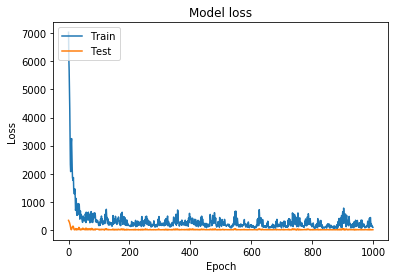

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Realizamos predicciones del test

In [14]:
model.predict(X_test)

array([[441.4477  ],
       [  3.790585],
       [585.0943  ]], dtype=float32)

Comprobamos

In [15]:
y_test

,45
0,444
7,3
11,609


# Predicción

In [16]:
country_prediction_namelist = ['Mexico']

In [17]:
db = open('database_prediction.csv','w')

print("Pais","Area","poblacion","Namerica","Samerica","Europe","Asia","Oceania","Africa","lat","long","Dia_inicio","PIB","Gasto_Salud",end=',',file=db,sep=',')
for value in range(dias_a_usar):
    print(value+1,file=db,end = ',')
print(dia_a_predecir,file=db)

for country in country_prediction_namelist:
    f = open('propiedades_por_pais.csv')
    for line in f:
        if(country == line.replace('\n','').split(',')[0]):
            pais=line.replace('\n','').split(',')[0]
            superficie=line.replace('\n','').split(',')[1]
            poblacion=line.replace('\n','').split(',')[2]
            namerica=line.replace('\n','').split(',')[3]
            samerica=line.replace('\n','').split(',')[4]
            europe=line.replace('\n','').split(',')[5]
            asia=line.replace('\n','').split(',')[6]
            oceania=line.replace('\n','').split(',')[7]
            africa=line.replace('\n','').split(',')[8]
            pib=line.replace('\n','').split(',')[9]
            salud_pib=line.replace('\n','').split(',')[10]            
    f.close()
    
    f = open('database_confirmed.csv')
    infected = []
    dia_inicio = 0
    for line in f:
        if(country == line.split(',')[1]):
            lat = float(line.split(',')[2])
            long = float(line.split(',')[3])
            country_data = []
            data = line.replace('\n','').split(',')[4:]
            for number in data:
                if(number != '0'):
                    infected.append(int(number))
                else:
                    dia_inicio += 1                    
    f.close()

    if(len(infected)<dias_a_usar):
        continue    
    print(pais,superficie,poblacion,namerica,samerica,europe,asia,oceania,africa,lat,long,dia_inicio,pib,salud_pib,end=',',file=db,sep=',')
    for value in infected[:dias_a_usar]:
        print(value,file=db,end = ',')
    if(len(infected)>=dia_a_predecir):
        print(infected[dia_a_predecir-1],file=db)
    else:
        print(-1,file=db)
db.close()          

In [18]:
data_prediction = pd.read_csv("database_prediction.csv",sep=',') 

In [19]:
data_prediction

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,36,37,38,39,40,41,42,43,44,45
0,Mexico,1964375.0,126577691.0,1,0,0,0,0,0,23.6345,...,1510,1688,1890,2143,2439,2785,3181,3441,3844,-1


In [20]:
area_prediction = data_prediction.Area #returns a numpy array
#normalized_area=(area-area.mean())/area.std()
normalized_area_prediction=(area_prediction-areamin)/(areamax-areamin)
data_prediction['Area'] = normalized_area_prediction

poblacion_prediction = data_prediction.poblacion #returns a numpy array
#normalized_poblacion=(poblacion-poblacion.mean())/poblacion.std()
normalized_poblacion_prediction=(poblacion_prediction-poblacionmin)/(poblacionmax-poblacionmin)
data_prediction['poblacion'] = normalized_poblacion_prediction

lat_prediction = data_prediction.lat #returns a numpy array
normalized_lat_prediction=(lat_prediction-latmin)/(latmax-latmin)
data_prediction['lat'] = normalized_lat_prediction

long_prediction = data_prediction.long #returns a numpy array
normalized_long_prediction=(long_prediction-longmin)/(longmax-longmin)
data_prediction['long'] = normalized_long_prediction

Dia_inicio_prediction = data_prediction.Dia_inicio #returns a numpy array
normalized_Dia_inicio_prediction=(Dia_inicio_prediction-Dia_iniciomin)/(Dia_iniciomax-Dia_iniciomin)
data_prediction['Dia_inicio'] = normalized_Dia_inicio_prediction

PIB_prediction = data_prediction.PIB #returns a numpy array
normalized_PIB_prediction=(PIB_prediction-PIBmin)/(PIBmax-PIBmin)
data_prediction['PIB'] = normalized_PIB_prediction

Gasto_Salud_prediction = data_prediction.Gasto_Salud #returns a numpy array
normalized_Gasto_Salud_prediction=(Gasto_Salud_prediction-Gasto_Saludmin)/(Gasto_Saludmax-Gasto_Saludmin)
data_prediction['Gasto_Salud'] = normalized_Gasto_Salud_prediction

In [21]:
data_prediction

,Pais,Area,poblacion,Namerica,Samerica,Europe,Asia,Oceania,Africa,lat,...,36,37,38,39,40,41,42,43,44,45
0,Mexico,0.11485,0.089279,1,0,0,0,0,0,0.579509,...,1510,1688,1890,2143,2439,2785,3181,3441,3844,-1


In [22]:
from sklearn.model_selection import train_test_split
X_prediction = pd.DataFrame()
#X['Pais'] = data['Pais']#,'Area','poblacion','Continente','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
X_prediction['Area'] = data_prediction['Area']
X_prediction['poblacion'] = data_prediction['poblacion']
#X_prediction['Namerica'] = data_prediction['Namerica']
#X_prediction['Samerica'] = data_prediction['Samerica']
#X_prediction['Europe'] = data_prediction['Europe']
#X_prediction['Asia'] = data_prediction['Asia']
#X_prediction['Oceania'] = data_prediction['Oceania']
#X_prediction['Africa'] = data_prediction['Africa']
X_prediction['lat'] = data_prediction['lat']
X_prediction['long'] = data_prediction['long']
X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
X_prediction['PIB'] = data_prediction['PIB']
#X_prediction['Gasto_Salud'] = data_prediction['Gasto_Salud']
for i in range(1,dias_a_usar+1):
    X_prediction[str(i)] = data_prediction[str(i)]
Y_prediction = pd.DataFrame()
Y_prediction[str(dia_a_predecir)] = data_prediction[str(dia_a_predecir)]
print(X_prediction.shape, Y_prediction.shape)

(1, 50) (1, 1)


In [23]:
model.predict(X_prediction)

array([[4150.2954]], dtype=float32)

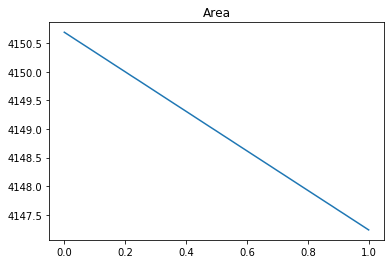

In [24]:
pred_area = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    #X['Pais'] = data['Pais']#,'Area','poblacion','Continente','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
    X_prediction['Area'] = np.asarray([i])#data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction[str(dia_a_predecir)] = data_prediction[str(dia_a_predecir)]
    pred_area.append(model.predict(X_prediction)[0])
plt.title("Area")
plt.plot(x,pred_area)

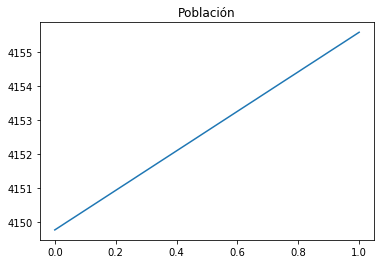

In [25]:
pred_poblacion = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    #X['Pais'] = data['Pais']#,'Area','poblacion','Continente','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = np.asarray([i])#data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction[str(dia_a_predecir)] = data_prediction[str(dia_a_predecir)]
    pred_poblacion.append(model.predict(X_prediction)[0])
plt.title("Población")
plt.plot(x,pred_poblacion)

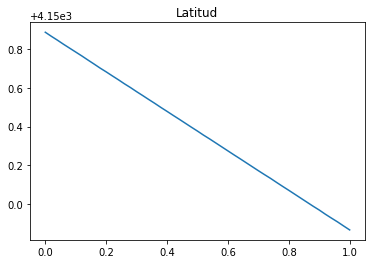

In [26]:
pred_latitud = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    #X['Pais'] = data['Pais']#,'Area','poblacion','Continente','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = np.asarray([i])#data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction[str(dia_a_predecir)] = data_prediction[str(dia_a_predecir)]
    pred_latitud.append(model.predict(X_prediction)[0])
plt.title("Latitud")
plt.plot(x,pred_latitud)

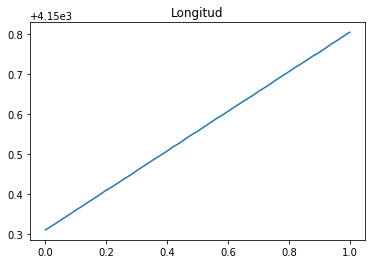

In [27]:
pred_longitud = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    #X['Pais'] = data['Pais']#,'Area','poblacion','Continente','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = np.asarray([i])#data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction[str(dia_a_predecir)] = data_prediction[str(dia_a_predecir)]
    pred_longitud.append(model.predict(X_prediction)[0])
plt.title("Longitud")
plt.plot(x,pred_longitud)

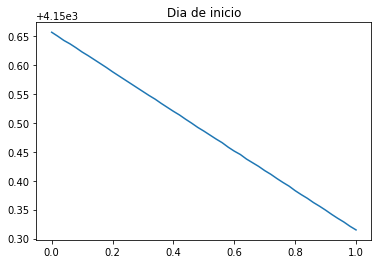

In [28]:
pred_dia_inicio = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    #X['Pais'] = data['Pais']#,'Area','poblacion','Continente','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = np.asarray([i])#data_prediction['Dia_inicio']
    X_prediction['PIB'] = data_prediction['PIB']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction[str(dia_a_predecir)] = data_prediction[str(dia_a_predecir)]
    pred_dia_inicio.append(model.predict(X_prediction)[0])
plt.title("Dia de inicio")
plt.plot(x,pred_dia_inicio)

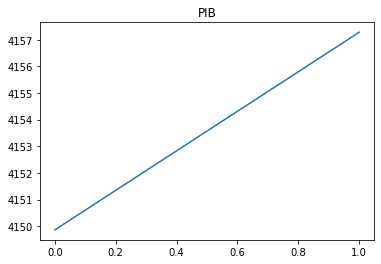

In [29]:
pred_pib = []
x = np.linspace(0,1.0,51)
for i in x:
    X_prediction = pd.DataFrame()
    #X['Pais'] = data['Pais']#,'Area','poblacion','Continente','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28']
    X_prediction['Area'] = data_prediction['Area']
    X_prediction['poblacion'] = data_prediction['poblacion']  
    #X_prediction['Namerica'] = data_prediction['Namerica']
    #X_prediction['Samerica'] = data_prediction['Samerica']
    #X_prediction['Europe'] = data_prediction['Europe']
    #X_prediction['Asia'] = data_prediction['Asia']
    #X_prediction['Oceania'] = data_prediction['Oceania']
    #X_prediction['Africa'] = data_prediction['Africa']
    X_prediction['lat'] = data_prediction['lat']    
    X_prediction['long'] = data_prediction['long']
    X_prediction['Dia_inicio'] = data_prediction['Dia_inicio']
    X_prediction['PIB'] = np.asarray([i])#data_prediction['PIB']
    for i in range(1,dias_a_usar+1):
        X_prediction[str(i)] = data_prediction[str(i)]
    Y_prediction = pd.DataFrame()
    Y_prediction[str(dia_a_predecir)] = data_prediction[str(dia_a_predecir)]
    pred_pib.append(model.predict(X_prediction)[0])
plt.title("PIB")
plt.plot(x,pred_pib)

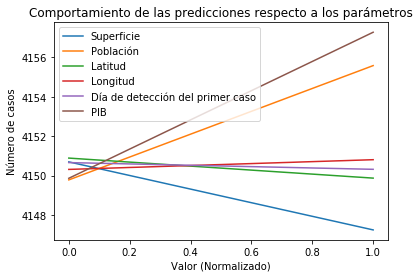

In [30]:
plt.plot(x,pred_area,label="Superficie")
plt.plot(x,pred_poblacion,label="Población")
plt.plot(x,pred_latitud,label="Latitud")
plt.plot(x,pred_longitud,label="Longitud")
plt.plot(x,pred_dia_inicio,label="Día de detección del primer caso")
plt.plot(x,pred_pib,label="PIB")
#plt.plot(x,pred_cuarentena,label="Dia de inicio de la cuarentena")
#plt.plot(x,pred_dia,label="Día")

plt.xlabel("Valor (Normalizado)")
plt.ylabel("Número de casos")
plt.title("Comportamiento de las predicciones respecto a los parámetros")

plt.legend()
#plt.show()
plt.savefig("comp.png", dpi=600)